In [1]:
import matplotlib.pyplot as plt
import templateflow.api as tflow
from nilearn import image, plotting

In [2]:
bg_img = str(tflow.get("MNI152NLin6Asym", desc="brain", resolution=1, suffix="T1w"))
bg_mask = str(tflow.get("MNI152NLin6Asym", desc="brain", resolution=2, suffix="mask"))

nps = image.load_img("../data/pain-sigs/nps.nii.gz")

cbf = image.math_img(
    "img1 * img2",
    img1=image.index_img(
        "../data/figures/sub-c001_ses-mri2_run-5_space-MNI152NLin6Asym_res-2_desc-scrub_cbf.nii.gz",
        0,
    ),
    img2=bg_mask,
)
cbf = image.resample_to_img(cbf, nps, interpolation="linear")

bold = image.math_img(
    "img1 * img2",
    img1="../data/bold/sub-c029/sub-c029_task-h1_desc-preproc_pe.nii.gz",
    img2=bg_mask,
)
bold = image.resample_to_img(bold, nps, interpolation="linear")

In [3]:
def plot_img(img, bg_img=None, vmax=None, alpha=None, cmap="RdYlBu_r"):
    """Plots a 3-panel: (1) whole brain, (2) zoomed in cross-section, and (3) flattened vector."""
    fig, ax = plt.subplots(1, 3, gridspec_kw={"width_ratios": [1, 1, 0.055]})
    fig.tight_layout(pad=1)

    kwargs = dict(
        display_mode="z",
        cut_coords=[0],
        black_bg=False,
        annotate=False,
        colorbar=False,
        resampling_interpolation="nearest",
        alpha=alpha,
        vmax=vmax,
        cmap=cmap,
    )

    wb = plotting.plot_stat_map(img, axes=ax[0], bg_img=bg_img, **kwargs)

    img = image.math_img("img1 * img2", img1=img, img2=image.binarize_img(nps))

    zoom = plotting.plot_stat_map(img, axes=ax[1], bg_img=None, **kwargs)
    zoom.axes[0].ax.set_xlim(23, 61)
    zoom.axes[0].ax.set_ylim(-25, 27)

    vect = plotting.plot_stat_map(img, axes=ax[2], **kwargs)
    vect.axes[0].ax.set_xlim(36, 38)
    vect.axes[0].ax.set_ylim(-24, 26)

    return fig

/usr/local/Caskroom/miniconda/base/envs/med-pain-sig/lib/python3.11/site-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
/usr/local/Caskroom/miniconda/base/envs/med-pain-sig/lib/python3.11/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


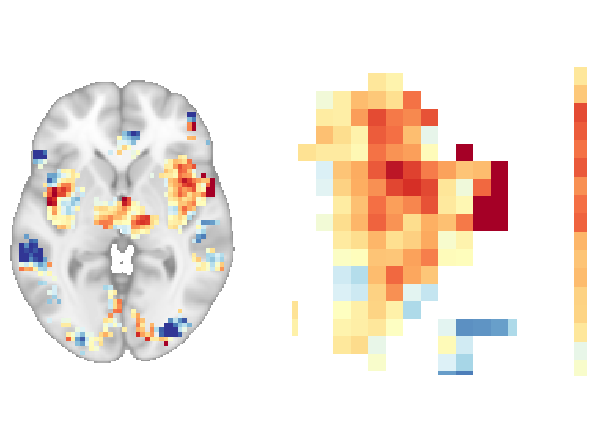

In [4]:
fig = plot_img(nps, bg_img=bg_img, vmax=0.015, alpha=1.0)
fig.savefig("../figures/fig01-nps.png", dpi=300)

/usr/local/Caskroom/miniconda/base/envs/med-pain-sig/lib/python3.11/site-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)


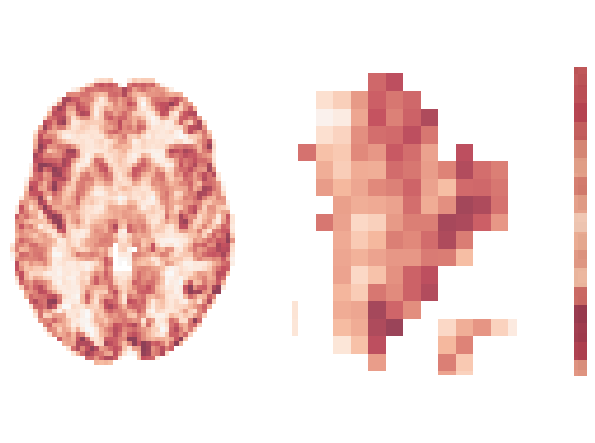

In [5]:
fig = plot_img(cbf, vmax=100, alpha=0.75, cmap="RdBu_r")
fig.savefig("../figures/fig01-cbf.png", dpi=300)

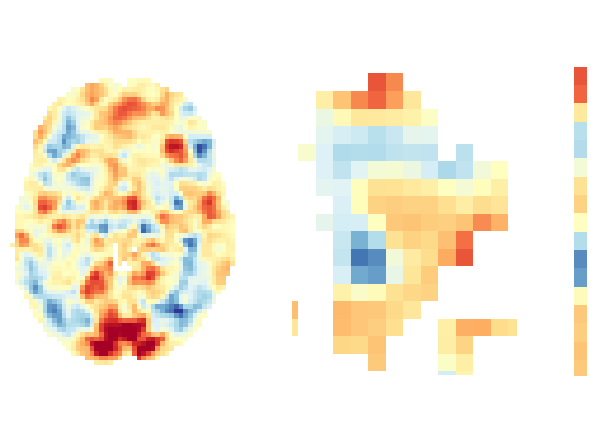

In [6]:
fig = plot_img(bold, vmax=0.4, alpha=1.0)
fig.savefig("../figures/fig01-bold.png", dpi=300)